# Fraud Detection on Transaction Data

## Imports

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Set Working Directory

In [6]:
import os
os.chdir(os.getcwd())
os.chdir("C:/Users/MelodyPogula/Downloads")

## Data

In [8]:
### Data
train_df = pd.read_csv("transaction.csv")
data = train_df.copy()

X = data.drop(columns=["isFraud"])
y = data["isFraud"]

## split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=7406
)


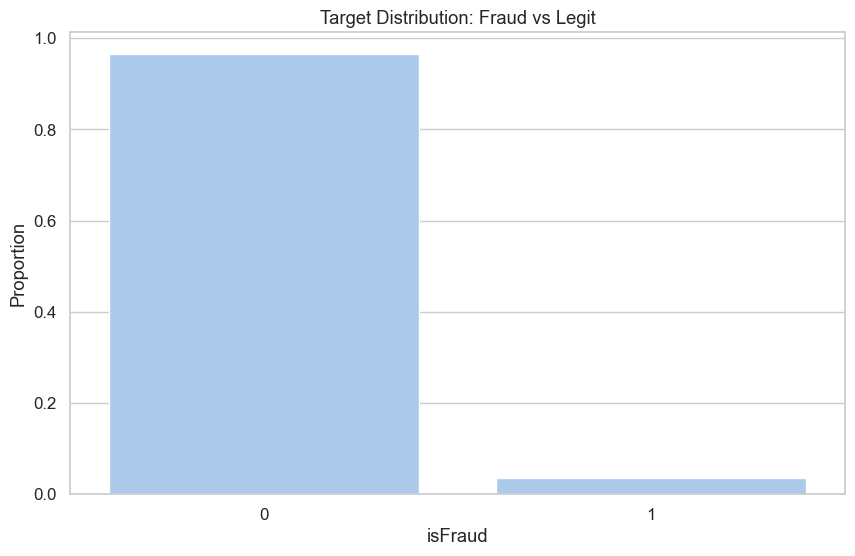

In [9]:
### EDA
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)
# fraud vs legit
fraud_counts = y_train.value_counts(normalize=True)
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title("Target Distribution: Fraud vs Legit")
plt.xlabel("isFraud")
plt.ylabel("Proportion")
plt.show()


In [ ]:
# missing data
missing_ratio = X_train.isnull().mean().sort_values(ascending=False)
top_missing = len(missing_ratio[missing_ratio>=.5])
print(str(top_missing)+ " Columns are Missing more than 50% of data")

282 Columns are Missing more than 5% of data
174 Columns are Missing more than 50% of data


### Encoding

In [ ]:
cat_cols = X_train.select_dtypes(include=["object"]).columns
num_cols = X_train.select_dtypes(exclude=["object"]).columns
# one-hot encode
X_train_enc = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test_enc = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)